In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(pd.read_csv("S02-hw-dataset.csv"))

In [4]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [7]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [8]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [9]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
df[(df['age'] > 100) | (df['age'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [11]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [12]:
df[(df['age'] < 14) & (df['revenue'] > 0)]

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


Проблема датасета в том, что не сповпадает контекст значений дохода, покупок и возраста. Также сами значения в ячейке может не соответствовать логике столбца.

In [13]:
df.value_counts("revenue")

revenue
0       4
511     2
1162    1
828     1
904     1
980     1
1080    1
1104    1
1115    1
1296    1
749     1
1302    1
1440    1
1488    1
1608    1
1652    1
2086    1
2358    1
785     1
738     1
142     1
442     1
183     1
330     1
342     1
399     1
404     1
432     1
445     1
702     1
456     1
546     1
630     1
650     1
654     1
693     1
2475    1
Name: count, dtype: int64

In [14]:
df.groupby('country').agg(
    Avg_Age=('age', 'mean'),
    Total_Purchases=('purchases', 'sum'),
    Avg_Revenue_Per_User=('revenue', 'mean'),
    Total_Revenue=('revenue', 'sum'),
    Num_Users=('user_id', 'count')
)

,Avg_Age,Total_Purchases,Avg_Revenue_Per_User,Total_Revenue,Num_Users
country,,,,,
CN,24.000000,9,1054.000000,2108,2
DE,34.600000,39,1445.500000,8673,6
FR,46.250000,51,675.916667,8111,12
RU,30.076923,62,790.076923,10271,13
US,36.714286,37,557.375000,4459,8


-Доминирование категорий: 
    Страны RU (Россия) и FR (Франция) доминируют в датасете
-Различие групп по средним значениям:
    По выручке: RU имеет самую высокую среднюю выручку на пользователя
    По возрасту: Страны в целом имеют схожий средний возраст (около 35-37 лет), за исключением CN, где средний возраст немного ниже (24 года).
-Неожиданные эффекты:
    У Германия самый высокий средний доход, а у Америки самый маленький

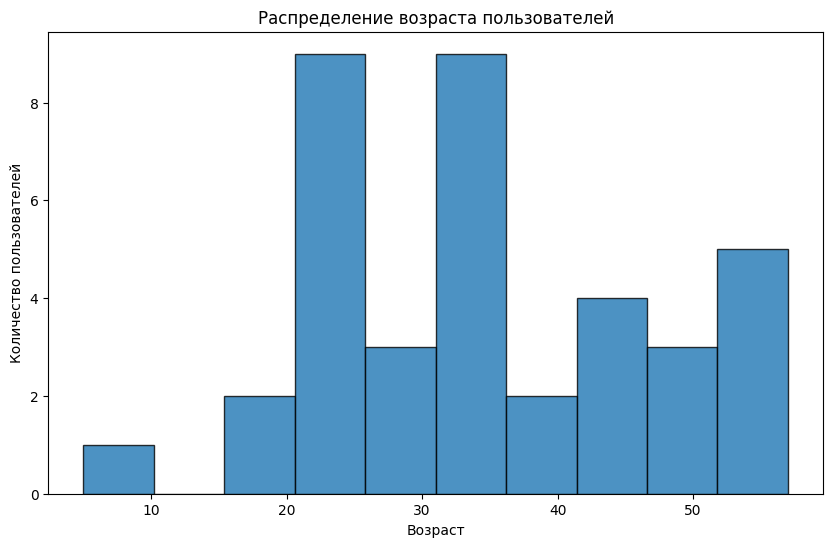

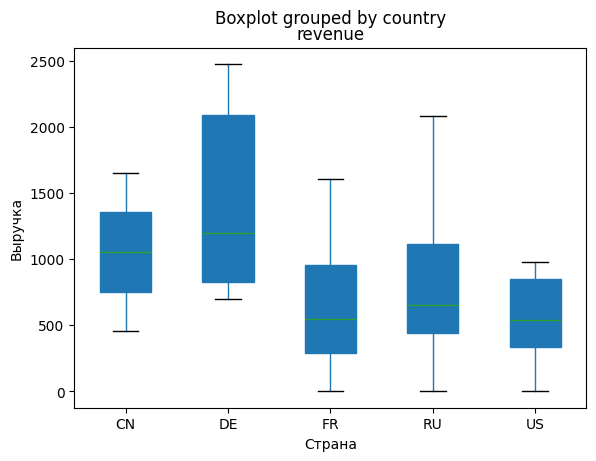

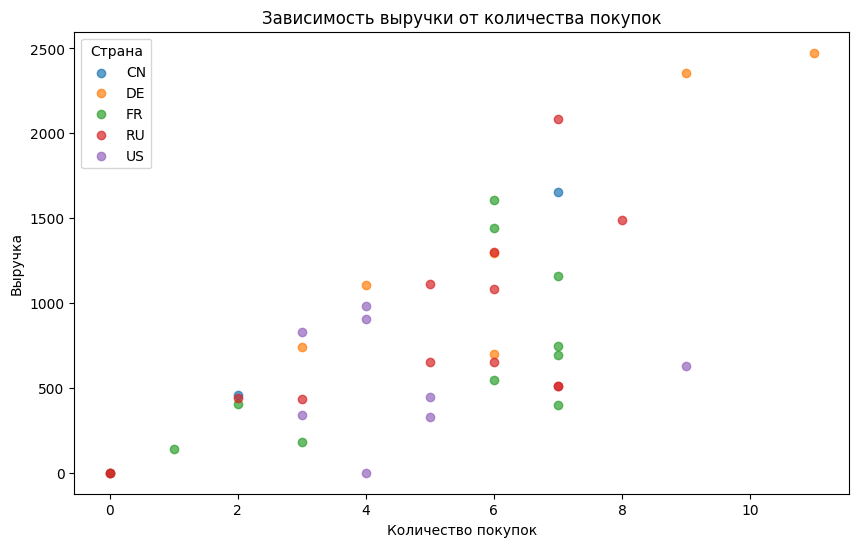

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['age'] < 100]['age'], edgecolor='black', alpha=0.8)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.savefig("figures/my_histogram.png")
plt.show()
df_clean = df[df['purchases'] >= 0]
df_clean.boxplot(column='revenue', by='country', grid=False, patch_artist=True)
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig("figures/boxplot.png")
plt.show()
plt.figure(figsize=(10, 6))
for name, group in df_clean.groupby('country'):
    plt.scatter(group['purchases'], group['revenue'], label=name, alpha=0.7)
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.legend(title='Страна')
plt.savefig("figures/scatter.png")
plt.show()


